In [1]:
# demo.ipynb
import sys
import os

# If needed, make sure we can import from parent directory
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import pandas as pd
from status_classifier import classify_status
from hierarchy_classifier import load_model, build_index, classify_field_of_work
from translator import translate_to_english



C:\Users\j-wu1\anaconda3\envs\mynlp\lib\site-packages\transformers\models\marian\tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


In [2]:
# Load model and build index
model = load_model()
nodes_by_level = build_index(model)

# Example dataset with 50 entries
data = [
    {"Status": "在校生", "Field_of_Work": "生物医学研究"},
    {"Status": "已工作", "Field_of_Work": "AI in medical imaging"},
    {"Status": "student", "Field_of_Work": "Investment banking"},
    {"Status": "working", "Field_of_Work": "Pharmaceutical clinical trials"},
    {"Status": "N/A", "Field_of_Work": "N/A"},
    {"Status": "在校生", "Field_of_Work": "机械工程"},  # Mechanical engineering
    {"Status": "已工作", "Field_of_Work": "health insurance"},
    {"Status": "in study", "Field_of_Work": "university research"},
    {"Status": "working", "Field_of_Work": "远程医疗服务"},  # Telemedicine service
    {"Status": "已工作", "Field_of_Work": "cloud computing SaaS"},
    {"Status": "working", "Field_of_Work": "cultural anthropology"},
    {"Status": "in study", "Field_of_Work": "-"},
    {"Status": "已工作", "Field_of_Work": "移动应用开发"},  # Mobile app development
    {"Status": "在校生", "Field_of_Work": "纳米材料科学"},  # Nanomaterials science
    {"Status": "已工作", "Field_of_Work": "Software engineering"},
    {"Status": "student", "Field_of_Work": "公共卫生"},  # Public health
    {"Status": "working", "Field_of_Work": "Big data analytics"},
    {"Status": "N/A", "Field_of_Work": "N/A"},
    {"Status": "in study", "Field_of_Work": "环境工程"},  # Environmental engineering
    {"Status": "已工作", "Field_of_Work": "Machine learning in healthcare"},
    {"Status": "在校生", "Field_of_Work": "神经科学"},  # Neuroscience
    {"Status": "working", "Field_of_Work": "Supply chain management"},
    {"Status": "in study", "Field_of_Work": "药物发现"},  # Drug discovery
    {"Status": "student", "Field_of_Work": "Telecommunication systems"},
    {"Status": "已工作", "Field_of_Work": "保险精算"},  # Insurance actuarial work
    {"Status": "working", "Field_of_Work": "基因组学"},  # Genomics
    {"Status": "student", "Field_of_Work": "Artificial intelligence in robotics"},
    {"Status": "在校生", "Field_of_Work": "中医药研究"},  # Traditional Chinese Medicine research
    {"Status": "已工作", "Field_of_Work": "E-commerce product management"},
    {"Status": "working", "Field_of_Work": "临床药理学"},  # Clinical pharmacology
    {"Status": "in study", "Field_of_Work": "电气工程"},  # Electrical engineering
    {"Status": "N/A", "Field_of_Work": ""},
    {"Status": "在校生", "Field_of_Work": "心理学"},  # Psychology
    {"Status": "working", "Field_of_Work": "Human resources management"},
    {"Status": "已工作", "Field_of_Work": "区块链技术"},  # Blockchain technology
    {"Status": "student", "Field_of_Work": "食品科学与技术"},  # Food science and technology
    {"Status": "working", "Field_of_Work": "Quantum computing"},
    {"Status": "在校生", "Field_of_Work": "生物信息学"},  # Bioinformatics
    {"Status": "in study", "Field_of_Work": "化学工程"},  # Chemical engineering
    {"Status": "已工作", "Field_of_Work": "医疗器械设计"},  # Medical device design
    {"Status": "working", "Field_of_Work": "Legal consultancy in pharmaceuticals"},
    {"Status": "在校生", "Field_of_Work": "癌症免疫治疗"},  # Cancer immunotherapy
    {"Status": "student", "Field_of_Work": "公共政策分析"},  # Public policy analysis
    {"Status": "working", "Field_of_Work": "Remote patient monitoring"},
    {"Status": "已工作", "Field_of_Work": "生物制药制造"},  # Biopharmaceutical manufacturing
    {"Status": "N/A", "Field_of_Work": "n/a"},
    {"Status": "在校生", "Field_of_Work": "航空航天工程"},  # Aerospace engineering
    {"Status": "working", "Field_of_Work": "物联网研发"},  # Internet of Things (IoT) R&D
    {"Status": "student", "Field_of_Work": "社会学"},  # Sociology
    {"Status": "已工作", "Field_of_Work": "Healthcare operations"},
    {"Status": "在校生", "Field_of_Work": "教育技术开发"}  # Educational technology development
]


df = pd.DataFrame(data)

# Classify status
df['Unified_Status'] = df['Status'].apply(classify_status)

# Classify field of work with translation
def classify_fow_with_translation(field_text, status):
    if status == 'N/A':
        return None
    english_text = translate_to_english(field_text)
    return classify_field_of_work(english_text, model, nodes_by_level, max_depth=4)

df['Unified_Field_of_Work'] = df.apply(lambda row: classify_fow_with_translation(row['Field_of_Work'], row['Unified_Status']), axis=1)

df


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

C:\Users\j-wu1\anaconda3\envs\mynlp\lib\site-packages\huggingface_hub\file_download.py:139: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\j-wu1\.cache\huggingface\hub\models--sentence-transformers--all-MiniLM-L6-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

,Status,Field_of_Work,Unified_Status,Unified_Field_of_Work
0,在校生,生物医学研究,In study,"[Education & Research, Academic Research, Appl..."
1,已工作,AI in medical imaging,Working,"[Healthcare, Medical Devices, Diagnostic Devic..."
2,student,Investment banking,In study,"[Finance & Business, Banking, Digital Banking,..."
3,working,Pharmaceutical clinical trials,Working,"[Healthcare, Pharmaceuticals, R&D, Clinical Tr..."
4,N/A,N/A,N/A,None
5,在校生,机械工程,In study,"[Engineering & Technology, Mechanical Engineer..."
6,已工作,health insurance,Working,"[Healthcare, Healthcare Services, Clinics, Pri..."
7,in study,university research,In study,"[Education & Research, Academic Research, Fund..."
8,working,远程医疗服务,Working,"[Healthcare, Healthcare Services, Telemedicine..."
9,已工作,cloud computing SaaS,Working,"[Education & Research, Academic Research, Appl..."


In [2]:
import openpyxl
from tqdm import tqdm

In [3]:
# Load the Excel file and extract relevant columns
file_path = "6th HKU+ Alumni Talk(1-242).xlsx"  # Replace with the actual path to your Excel file
df_excel = pd.read_excel(
    file_path,
    usecols=["Current status / 目前身份狀態", "Fields of Work / 正在從事的領域和專業"]
)

In [4]:
print(df_excel['Fields of Work / 正在從事的領域和專業'].apply(type).value_counts())

Fields of Work / 正在從事的領域和專業
<class 'str'>      241
<class 'float'>      1
Name: count, dtype: int64


In [5]:
# Find rows where the 'Field_of_Work' column contains float types
float_rows = df_excel[df_excel['Fields of Work / 正在從事的領域和專業'].apply(lambda x: isinstance(x, float))]

# Display the rows with float types
print(float_rows)

    Current status / 目前身份狀態 Fields of Work / 正在從事的領域和專業
236            In study 在校生                         NaN


In [6]:
# Rename columns for easier access
df_excel.rename(
    columns={
        "Current status / 目前身份狀態": "Status",
        "Fields of Work / 正在從事的領域和專業": "Field_of_Work"
    },
    inplace=True
)

# Load model and build index
model = load_model()
nodes_by_level = build_index(model)


In [8]:
# Classify status column
df_excel['Unified_Status'] = df_excel['Status'].apply(classify_status)

# Classify field of work with translation
def classify_fow_with_translation(field_text, status):
    # Filter out invalid statuses
    if status in ['N/A', None] or pd.isna(status):
        return None
    # Filter out invalid field of work
    if field_text in ['N/A', 'NA', None, '-', '--', ''] or pd.isna(field_text):
        return None
    # Translate and classify valid entries
    english_text = translate_to_english(field_text)
    return classify_field_of_work(english_text, model, nodes_by_level, max_depth=4)

# Apply classification with progress bar
results = []
for _, row in tqdm(df_excel.iterrows(), total=df_excel.shape[0], desc="Processing Rows"):
    result = classify_fow_with_translation(row['Field_of_Work'], row['Unified_Status'])
    results.append(result)

# Assign the results back to the DataFrame
df_excel['Unified_Field_of_Work'] = results


rocessing Rows: 100%|███████████████████████████████████████████████████████████████| 242/242 [02:45<00:00,  1.46it/s]

Distribution of Number of Levels:
Num_Levels
0      2
4    240
Name: count, dtype: int64


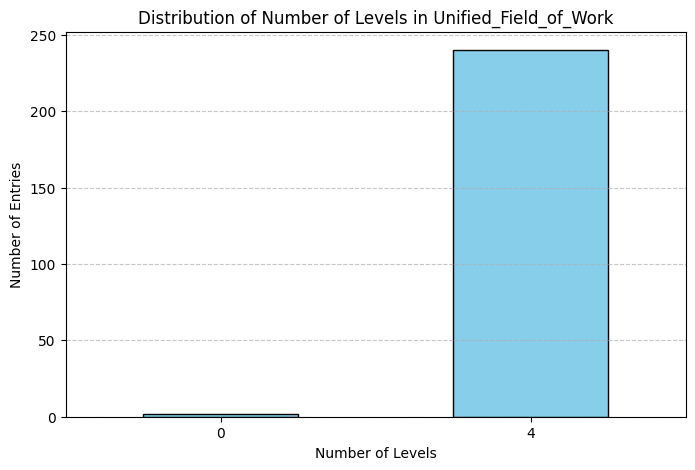

In [9]:
# Ensure we are handling missing or NaN values correctly
df_excel['Num_Levels'] = df_excel['Unified_Field_of_Work'].apply(lambda x: len(x) if isinstance(x, list) else 0)

# Check the distribution of the number of levels
level_distribution = df_excel['Num_Levels'].value_counts().sort_index()

# Print the distribution
print("Distribution of Number of Levels:")
print(level_distribution)

# Visualize the distribution with a bar chart
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
level_distribution.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Number of Levels in Unified_Field_of_Work')
plt.xlabel('Number of Levels')
plt.ylabel('Number of Entries')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [31]:
df_excel['Unified_Field_of_Work']

0      [Healthcare, Pharmaceuticals, R&D, Regulatory ...
1      [Healthcare, Healthcare Services, Clinics, Den...
2      [Engineering & Technology, Mechanical Engineer...
3      [Engineering & Technology, Mechanical Engineer...
4      [Healthcare, Pharmaceuticals, Manufacturing, A...
                             ...                        
237    [Finance & Business, Banking, Digital Banking,...
238    [Engineering & Technology, Information Technol...
239    [Engineering & Technology, Mechanical Engineer...
240    [Healthcare, Healthcare Services, Clinics, Pri...
241    [Healthcare, Healthcare Services, Hospitals, P...
Name: Unified_Field_of_Work, Length: 242, dtype: object

In [32]:
# Save to an Excel file
df_excel.to_excel("df_excel_output.xlsx", index=False)

In [10]:
from collections import defaultdict
import matplotlib.pyplot as plt

In [24]:
def aggregate_three_levels(df, field_key='Unified_Field_of_Work'):
    # We'll create a DataFrame with columns: Level1, Level2, Level3, Count
    # If some entries have fewer than 3 levels, we can fill them with 'N/A'.
    level_counts = defaultdict(int)
    for path in df[field_key].dropna():
        # path is like ["Healthcare", "Pharmaceuticals", "R&D", "Clinical Trials"]
        # Take first three levels if available
        l1 = path[0] if len(path) > 0 else "N/A"
        l2 = path[1] if len(path) > 1 else "N/A"
        l3 = path[2] if len(path) > 2 else "N/A"
        level_counts[(l1, l2, l3)] += 1
        
    rows = []
    for (l1, l2, l3), count in level_counts.items():
        rows.append({"Level1": l1, "Level2": l2, "Level3": l3, "Count": count})
    agg_df = pd.DataFrame(rows)
    return agg_df

# Example: We simulate df here. In practice, df will be your classified DataFrame from your pipeline.
# Let's say df has a column Unified_Field_of_Work:
example_data = [
    {"Unified_Field_of_Work": ["Healthcare", "Pharmaceuticals", "R&D", "Clinical Trials"]},
    {"Unified_Field_of_Work": ["Healthcare", "Pharmaceuticals", "R&D", "Drug Discovery"]},
    {"Unified_Field_of_Work": ["Healthcare", "Pharmaceuticals", "Manufacturing", "Quality Control"]},
    {"Unified_Field_of_Work": ["Healthcare", "Healthcare Services", "Hospitals", "Private Hospitals"]},
    {"Unified_Field_of_Work": ["Engineering & Technology", "Information Technology", "AI & Machine Learning", "Computer Vision"]},
    {"Unified_Field_of_Work": ["Engineering & Technology", "Information Technology", "Software Development", "Mobile App Development"]},
    {"Unified_Field_of_Work": ["Finance & Business", "Banking", "Retail Banking", "Credit Cards"]},
    {"Unified_Field_of_Work": ["Finance & Business", "Investment", "Venture Capital", "Tech-Focused Funds"]},
    {"Unified_Field_of_Work": ["Education & Research", "Academic Research", "Fundamental Sciences", "Particle Physics"]},
    {"Unified_Field_of_Work": ["Education & Research", "Academic Research", "Applied Sciences", "Biotechnology"]},
    # Add more rows as needed...
]

df_example = pd.DataFrame(example_data)
agg_df = aggregate_three_levels(df_excel, 'Unified_Field_of_Work')

# agg_df now looks like:
#   Level1                Level2                Level3               Count
# 0 Healthcare           Pharmaceuticals         R&D                   2 (for example)
# 1 Healthcare           Pharmaceuticals         Manufacturing         1
# 2 Healthcare           Healthcare Services     Hospitals             1
# 3 Engineering & ...    Information Technology  AI & Machine Learning 1
# ...
#
# Now we create a sunburst chart. We'll use Level1, Level2, Level3 as the hierarchy.

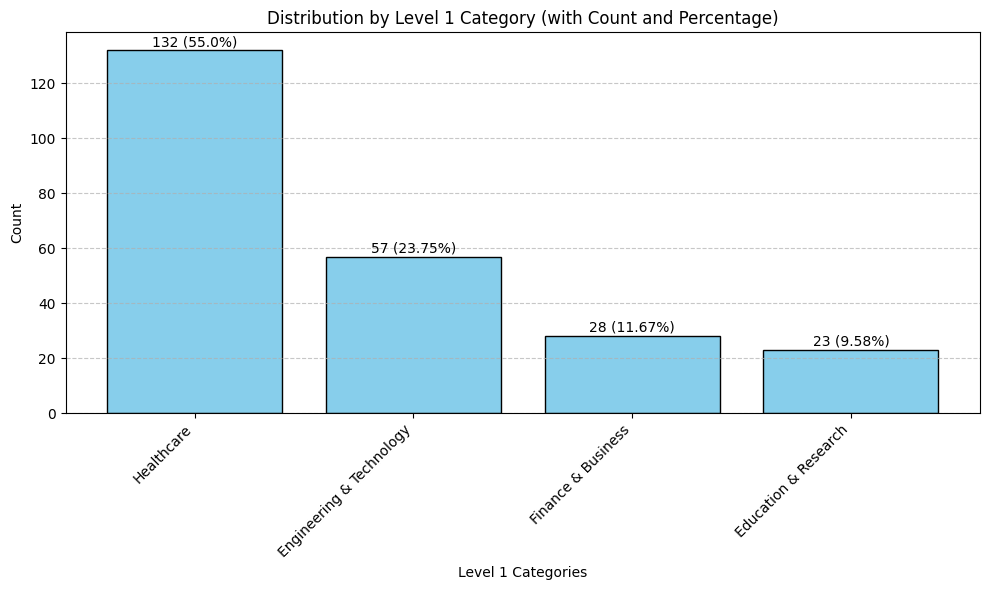

In [25]:
# Example data (replace with your actual agg_df)
# agg_df = pd.DataFrame([
#     {"Level1": "Healthcare", "Level2": "Pharmaceuticals", "Level3": "R&D", "Count": 10},
#     {"Level1": "Healthcare", "Level2": "Pharmaceuticals", "Level3": "Manufacturing", "Count": 5},
#     {"Level1": "Healthcare", "Level2": "Healthcare Services", "Level3": "Hospitals", "Count": 7},
#     {"Level1": "Engineering & Technology", "Level2": "Information Technology", "Level3": "AI & Machine Learning", "Count": 12},
#     {"Level1": "Engineering & Technology", "Level2": "Information Technology", "Level3": "Software Development", "Count": 8},
#     {"Level1": "Finance & Business", "Level2": "Banking", "Level3": "Retail Banking", "Count": 4},
#     {"Level1": "Finance & Business", "Level2": "Investment", "Level3": "Venture Capital", "Count": 6},
# ])

# Distribution at Level 1 with Count and Percentage
level1_counts = agg_df.groupby("Level1")["Count"].sum().sort_values(ascending=False)
total_count = level1_counts.sum()
percentages = (level1_counts / total_count * 100).round(2)

plt.figure(figsize=(10, 6))  # Increased figure size
bars = plt.bar(level1_counts.index, level1_counts, color='skyblue', edgecolor='black')

# Add numbers and percentages on top of each bar
for bar, pct, cnt in zip(bars, percentages, level1_counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5,
             f"{cnt} ({pct}%)", ha='center', va='bottom')

plt.title("Distribution by Level 1 Category (with Count and Percentage)")
plt.xlabel("Level 1 Categories")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [26]:
import plotly.io as pio

# For Jupyter Notebook:
pio.renderers.default = "browser"  # Alternatively, use "notebook_connected"

In [27]:
import plotly.io as pio
print(pio.renderers)

Renderers configuration
-----------------------
    Default renderer: 'browser'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']



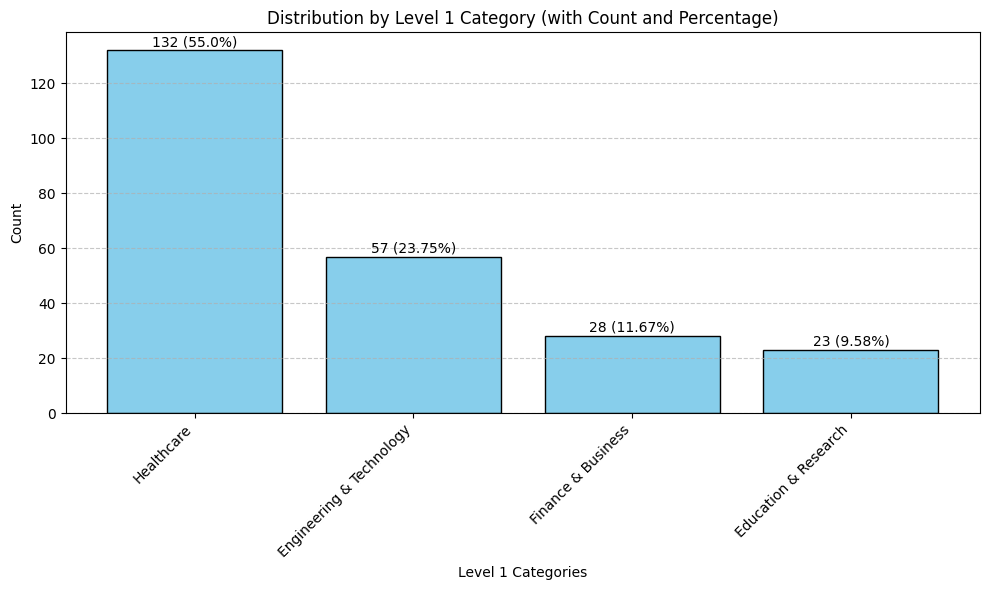

In [28]:
level1_counts = agg_df.groupby("Level1")["Count"].sum().sort_values(ascending=False)
total_count = level1_counts.sum()
percentages = (level1_counts / total_count * 100).round(2)

plt.figure(figsize=(10, 6))  # Increased figure size
bars = plt.bar(level1_counts.index, level1_counts, color='skyblue', edgecolor='black')

# Add numbers and percentages on top of each bar
for bar, pct, cnt in zip(bars, percentages, level1_counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5,
             f"{cnt} ({pct}%)", ha='center', va='bottom')

plt.title("Distribution by Level 1 Category (with Count and Percentage)")
plt.xlabel("Level 1 Categories")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



In [34]:
import pandas as pd
import plotly.graph_objects as go
import plotly.io as pio


# Configure renderer
pio.renderers.default = "browser"

# Iterate through all unique Level 1 categories
unique_level1_categories = agg_df["Level1"].unique()

for chosen_level1 in unique_level1_categories:
    subset = agg_df[agg_df["Level1"] == chosen_level1]
    subset_level2_totals = subset.groupby("Level2")["Count"].sum()
    subset_total = subset["Count"].sum()

    # Prepare 3D data for Plotly
    x = []
    y = []
    z = []
    text = []

    level2_categories = subset["Level2"].unique()
    level3_categories = subset["Level3"].unique()

    for _, row in subset.iterrows():
        level2 = row["Level2"]
        level3 = row["Level3"]
        count = row["Count"]

        # Calculate percentages
        level2_pct = (count / subset_level2_totals[level2] * 100).round(2)
        total_pct = (count / subset_total * 100).round(2)

        x.append(level2)
        y.append(level3)
        z.append(count)
        text.append(f"{count} ({level2_pct}%, {total_pct}%)")

    # Convert categories to numeric for plotting
    level2_map = {cat: i for i, cat in enumerate(level2_categories)}
    level3_map = {cat: i for i, cat in enumerate(level3_categories)}

    # Prepare 3D coordinates for bars
    x_coords = [level2_map[row["Level2"]] for _, row in subset.iterrows()]
    y_coords = [level3_map[row["Level3"]] for _, row in subset.iterrows()]
    z_coords = [0] * len(x_coords)  # Bars start from 0
    heights = [row["Count"] for _, row in subset.iterrows()]

    # Create 3D Bar Plot using Scatter3d
    fig = go.Figure()

    # Add bars
    for i in range(len(x_coords)):
        # Draw each bar as a line
        fig.add_trace(go.Scatter3d(
            x=[x_coords[i], x_coords[i]],
            y=[y_coords[i], y_coords[i]],
            z=[z_coords[i], z_coords[i] + heights[i]],
            mode='lines',
            line=dict(color='blue', width=10),
            hoverinfo='skip',  # Disable hover for lines
        ))

        # Add always-visible text annotations
        fig.add_trace(go.Scatter3d(
            x=[x_coords[i]],
            y=[y_coords[i]],
            z=[z_coords[i] + heights[i]],
            mode='text',
            text=[text[i]],
            textposition="top center",
            hoverinfo='skip',  # Disable hover for text
            textfont=dict(
                size=11  # Adjust font size here
            )
        ))

    # Add axes and layout
    fig.update_layout(
        title=f"3D Distribution for {chosen_level1} (with Count and Percentage)",
        scene=dict(
            xaxis=dict(
                title=dict(text="Level 2 Categories", font=dict(size=12)),
                tickvals=list(level2_map.values()),
                ticktext=list(level2_map.keys()),
                tickangle=45,  # Angle the tick labels for readability
                tickfont=dict(size=10),  # Adjust font size of ticks
                showbackground=False,  # Remove x-axis background plane
                showgrid=True,  # Enable grid lines
                gridcolor="black",  # Set grid color
                gridwidth=1,  # Set grid width
            ),
            yaxis=dict(
                title=dict(text="Level 3 Categories", font=dict(size=12)),
                tickvals=list(level3_map.values()),
                ticktext=list(level3_map.keys()),
                tickangle=45,  # Angle the tick labels for readability
                tickfont=dict(size=10),  # Adjust font size of ticks
                showbackground=False,  # Remove y-axis background plane
                showgrid=True,  # Enable grid lines
                gridcolor="black",  # Set grid color
                gridwidth=1,  # Set grid width
            ),
            zaxis=dict(
                title=dict(text="Count", font=dict(size=12)),  # Adjust font size for title
                showbackground=False,  # Remove z-axis background plane
                showgrid=True,  # Enable grid lines
                gridcolor="black",  # Set grid color
                gridwidth=1,  # Set grid width
            ),
            # Set transparent background
            bgcolor='rgba(0,0,0,0)'
        ),
        # Set fully transparent background for figure
        paper_bgcolor='rgba(0,0,0,0)',
        plot_bgcolor='rgba(0,0,0,0)',
        margin=dict(l=0, r=0, b=0, t=40),  # Adjust layout margins
    )

    # Show interactive 3D plot for the current Level 1 category
    fig.show()